##  Applying Datetime functions

Examine whether the bicycle count shows any time-related patterns. Create a notebook in which you will solve the following questions:

1. Extract features like hour, month, etc. from the datetime column into their own columns

2. Plot small sections of the count data over time (1 day, 1 week, etc.)

3. Create a part_of_day column for the bike data. It should have the following labels: morning, afternoon, evening, night

4. Save your new dataset in a csv file (so you can reuse it later on)

5. Group data by one of the newly created time features and observe grouped means

#### Bonus

6. Make subset of data which only includes January 2011 observation. Add rolling average of the count to the new subset dataframe and plot the rolling average and count versus time.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('../data/dc_bikes.csv',parse_dates=['datetime'])

In [3]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,156
17375,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,104
17376,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,67
17377,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,43


### Extract features like hour, month, etc. from the datetime column into their own columns

In [4]:
df['hour'] = df['datetime'].dt.hour

In [5]:
df['month'] = df['datetime'].dt.month

In [6]:
df['weekday']= df['datetime'].dt.weekday

In [7]:
df['day'] = df['datetime'].dt.day

In [8]:
df['year'] = df['datetime'].dt.year

In [9]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,weekday,day,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16,0,1,5,1,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40,1,1,5,1,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32,2,1,5,1,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13,3,1,5,1,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1,4,1,5,1,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,156,19,12,0,31,2012
17375,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,104,20,12,0,31,2012
17376,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,67,21,12,0,31,2012
17377,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,43,22,12,0,31,2012


### Plot small sections of the count data over time (1 day, 1 week, etc.)

Text(0, 0.5, 'Count')

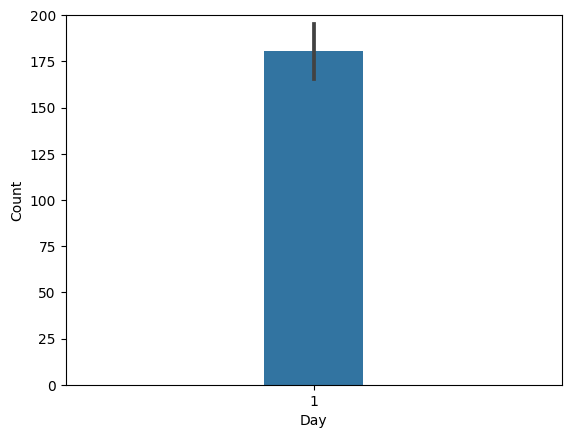

In [10]:
df_day= df [ df['day'] == 1]
sns.barplot(df_day,
            x= 'day',
            y= 'count')
plt.axis([-2, 2, 0, 200])
plt.xlabel('Day')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

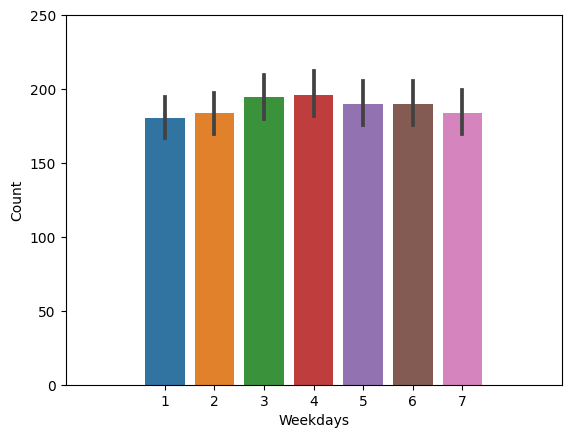

In [11]:
df_week= df [ df['day'] <=7 ]
sns.barplot(df_week,
            x= 'day',
            y= 'count')
plt.axis([-2, 8, 0, 250])
plt.xlabel('Weekdays')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

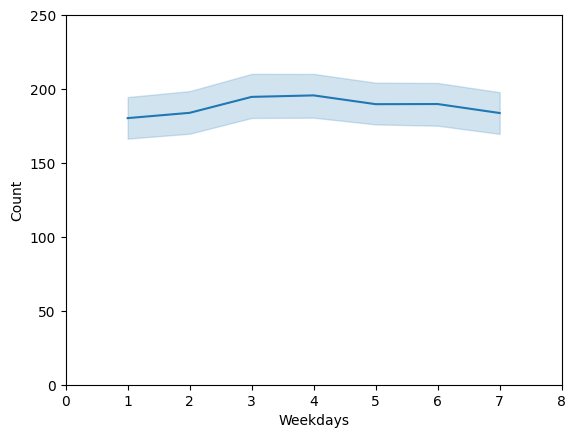

In [12]:
df_week= df [ df['day'] <=7 ]
sns.lineplot(df_week,
            x= 'day',
            y= 'count')
plt.axis([0, 8, 0, 250])
plt.xlabel('Weekdays')
plt.ylabel('Count')

#graph is showing the confidence interval range??

### Create a part_of_day column for the bike data. It should have the following labels: morning, afternoon, evening, night

In [13]:
df['hour'].min(), df['hour'].max()

(0, 23)

In [14]:
bin_labels = ['morning', 'afternoon', 'evening', 'night']

bin_boundaries = [-np.inf, 12, 17, 20, np.inf]

In [15]:
df['part_of_day']=pd.cut(df['hour'], bins=bin_boundaries, labels=bin_labels)

In [16]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,weekday,day,year,part_of_day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16,0,1,5,1,2011,morning
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40,1,1,5,1,2011,morning
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32,2,1,5,1,2011,morning
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13,3,1,5,1,2011,morning
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1,4,1,5,1,2011,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,156,19,12,0,31,2012,evening
17375,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,104,20,12,0,31,2012,evening
17376,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,67,21,12,0,31,2012,night
17377,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,43,22,12,0,31,2012,night


In [17]:
df.to_csv('../data/bike_dataset_new.csv', index=False)

### Group data by one of the newly created time features and observe grouped means

In [18]:
df_group_hour = df.groupby(['hour'])['count'].mean()

df_group_hour

hour
0      54.721763
1      33.743094
2      23.051748
3      12.229555
4       7.236729
5      20.337517
6      76.237241
7     208.914718
8     355.598349
9     217.140303
10    171.867950
11    206.818432
12    251.504121
13    252.094650
14    238.799726
15    249.893004
16    309.489041
17    459.472603
18    423.195055
19    310.722527
20    225.796703
21    171.752747
22    133.013736
23     89.640110
Name: count, dtype: float64

In [19]:
df_group_month = df.groupby(['month'])['temp'].mean()
df_group_month

month
1      9.743597
2     12.308561
3     16.027020
4     19.270856
5     24.386734
6     28.047986
7     30.974288
8     29.056908
9     25.276771
10    19.974431
11    15.137189
12    13.290856
Name: temp, dtype: float64

In [20]:
df_group_pod = df.groupby(['part_of_day'])['humidity'].mean()
df_group_pod

part_of_day
morning      68.343229
afternoon    50.198794
evening      56.996795
night        65.265110
Name: humidity, dtype: float64

### Bonus
- Make subset of data which only includes January 2011 observation. 
- Add rolling average of the count to the new subset dataframe and plot the rolling average and count versus time

C:\Users\HP\AppData\Local\Temp\ipykernel_13680\2561572372.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['rolling_avg'] = subset_df['count'].rolling(window=10).mean()
C:\Users\HP\AppData\Local\Temp\ipykernel_13680\2561572372.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xtick_labels) #used to edit the ticklabes


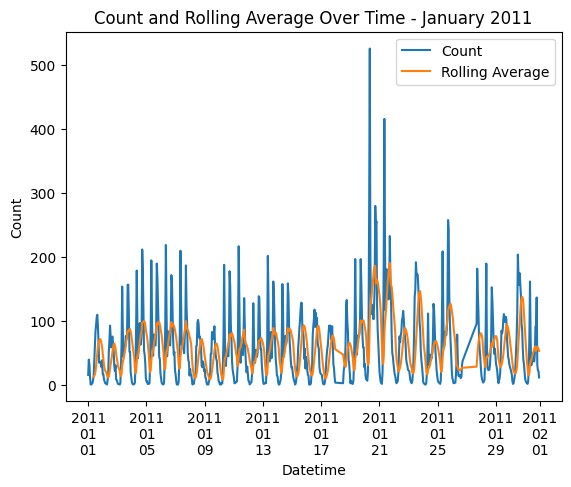

In [22]:
subset_df = df [ ( df['month'] == 1 ) & (df['year'] == 2011)]

subset_df['rolling_avg'] = subset_df['count'].rolling(window=10).mean()

sns.lineplot(data=subset_df, 
             x='datetime', 
             y='count', 
             label='Count')
sns.lineplot(data=subset_df,
             x='datetime', 
             y='rolling_avg', 
             label='Rolling Average')

xtick_labels = [str(label.get_text()).replace('-', '\n') for label in plt.gca().get_xticklabels()]
plt.gca().set_xticklabels(xtick_labels) #used to edit the ticklabes

plt.xlabel('Datetime')
plt.ylabel('Count')
plt.title('Count and Rolling Average Over Time - January 2011')
plt.legend();